In [14]:
from fastai.vision.all import *

In [15]:
path = Path().cwd().parent/"data"/"images"
path

Path('/home/ramonperez/Tresors/datascience/projects/strawberry_leafs/data/images')

In [ ]:
files = get_image_files(path=path)
verify_images(files)

In [ ]:
plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [ ]:
dls = plants.dataloaders(path)

In [12]:
dls.valid.items[-3:]

[Path('/home/ramonperez/Tresors/datascience/projects/strawberry_leafs/data/images/healthy/704.jpg'),
 Path('/home/ramonperez/Tresors/datascience/projects/strawberry_leafs/data/images/healthy/1429.jpg'),
 Path('/home/ramonperez/Tresors/datascience/projects/strawberry_leafs/data/images/healthy/479.jpg')]

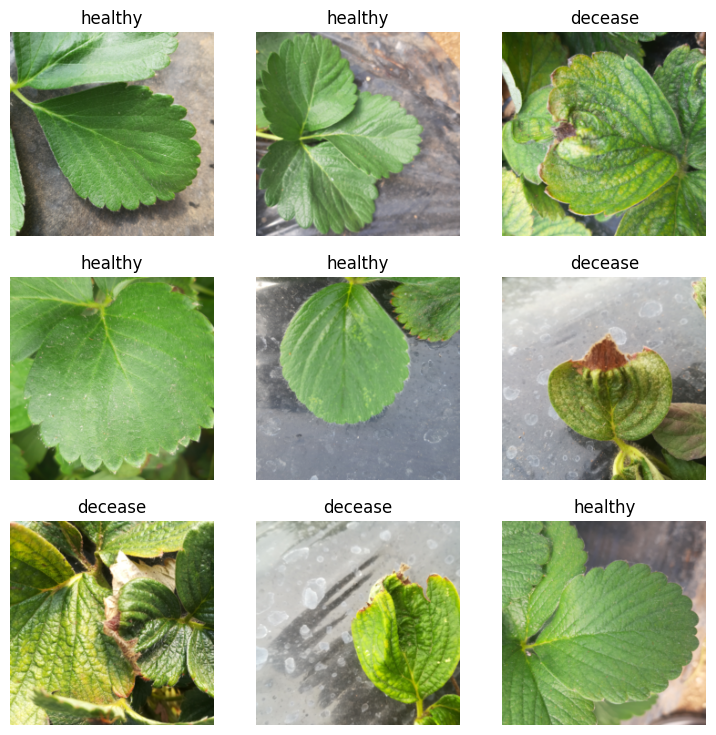

In [13]:
dls.show_batch()

Downloading `resnet34` will take a second.

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [21]:
learn.predict(path/"decease"/"4.jpg")

('decease', TensorBase(0), TensorBase([9.9999e-01, 1.1604e-05]))

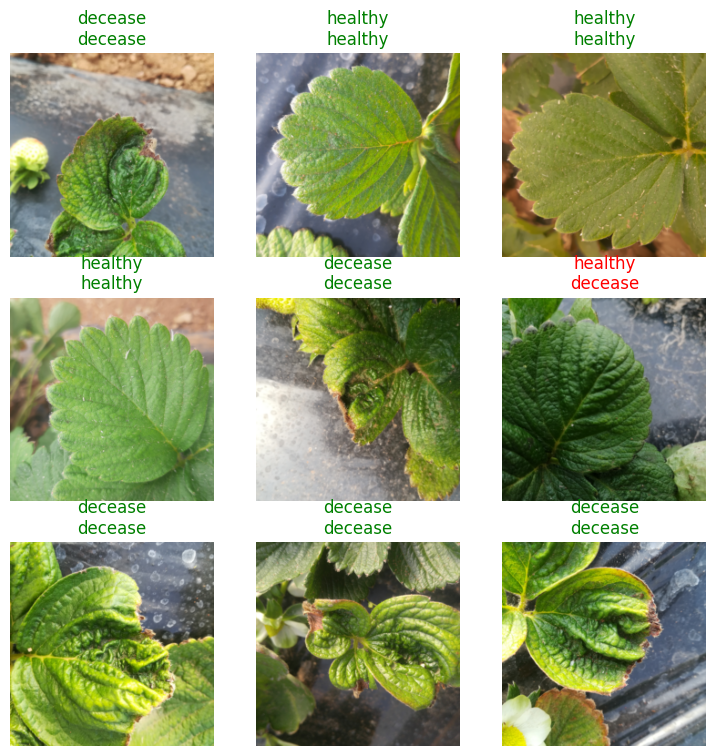

In [22]:
learn.show_results()

In [13]:
learn_inf.dls.vocab

['decease', 'healthy']

In [ ]:
learn.export(fname="models/model_1.pkl")

Get inference model.

In [6]:
learn_inf = load_learner(path.parents[1]/'models'/'model_1.pkl')

In [12]:
learn_inf.predict("../data/images/decease/1000.jpg")

('decease', TensorBase(0), TensorBase([1.0000e+00, 2.2133e-07]))